In [371]:
# include("travelling_wave_coev.jl")
# using .CoevolutionNetworkBase
# using Plots
# theme(:dracula)

In [372]:
# Parameters
L = 300.0
dx = 0.3
x = -L/2:dx:L/2-dx
r = 2.5
M = 200
beta = 1.8
alpha = 0.0
gamma = 0.8
# D = 0.0025
D = 0.007
Nh = 4 * 10^4
stochastic = true
sigma = 5.0 

migration_rates = [1e-0, 5e-5]

# Initialize viral and immune densities
viral_density = zeros(Float64, length(x))
viral_density[1] = 100/dx
viral_density2 = zeros(Float64, length(x))

immune_density = zeros(Float64, length(x))
immune_density2 = zeros(Float64, length(x))

# Create Population instances
population = Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density, immune_density; stochastic=stochastic, sigma=sigma)
population2 = Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density2, immune_density2; stochastic=stochastic, sigma=sigma)
populations = [population, population2]

# Create Network instance
migration_matrix = migration_rates[1] * ones(size(populations,1),size(populations,1)) # Define an appropriate migration matrix
println(size(migration_matrix,1))
network = Network(populations, migration_matrix);

# Create Simulation instance
dt = 0.1 # Define an appropriate time step size
duration = 2000.0 # Define an appropriate simulation duration
simulation = Simulation(network, dt, duration; thin_by=1);

@time run_simulation!(simulation);

# Initialize viral and immune densities
viral_density = zeros(Float64, length(x))
viral_density[1] = 100/dx
viral_density2 = zeros(Float64, length(x))

immune_density = zeros(Float64, length(x))
immune_density2 = zeros(Float64, length(x))

# Create Population instances
population = Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density, immune_density; stochastic=stochastic, sigma=sigma)
population2 = Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density2, immune_density2; stochastic=stochastic, sigma=sigma)
populations = [population, population2]


# Create Network instance
migration_matrix = migration_rates[2] * ones(size(populations,1),size(populations,1)) # Define an appropriate migration matrix
println(size(migration_matrix,1))
network = Network(populations, migration_matrix);

simulation2 = Simulation(network, dt, duration; thin_by=1);

@time run_simulation!(simulation2);

# Initialize viral and immune densities
viral_density = zeros(Float64, length(x))
viral_density[1] = 100/dx
viral_density2 = zeros(Float64, length(x))

immune_density = zeros(Float64, length(x))
immune_density2 = zeros(Float64, length(x))

# Create Population instances
population = Population(L, dx, r, M, beta, alpha, gamma, D, 2 * Nh, viral_density, immune_density; stochastic=stochastic, sigma=sigma)
populations = [population]


# Create Network instance
migration_matrix = 0.0 * ones(size(populations,1),size(populations,1)) # Define an appropriate migration matrix
println(size(migration_matrix,1))
network = Network(populations, migration_matrix);

simulation3 = Simulation(network, dt, duration; thin_by=1);

@time run_simulation!(simulation3);

data1 = calculate_mean_antigenicity_per_deme(simulation)
data2 = calculate_mean_antigenicity_per_deme(simulation2)
data3 = calculate_mean_antigenicity_per_deme(simulation3)

2
 27.702630 seconds (2 allocations: 156.359 KiB)
2
 27.718042 seconds (2 allocations: 156.359 KiB)
1
 13.834463 seconds (2 allocations: 156.359 KiB)


1×20001 Matrix{Float64}:
 -150.0  -149.996  -149.989  -149.99  …  111.423  111.437  111.44  111.442

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots C:\Users\Daniel\.julia\packages\Plots\sxUvK\src\utils.jl:106
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots C:\Users\Daniel\.julia\packages\Plots\sxUvK\src\utils.jl:106
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots C:\Users\Daniel\.julia\packages\Plots\sxUvK\src\utils.jl:106


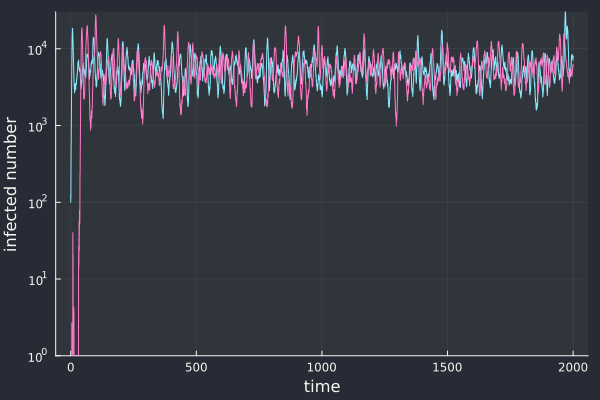

In [373]:
plot(simulation.duration_times, transpose(calculate_total_infected_per_deme(simulation2)), yscale=:log10, ylim=(1,Inf), legend=false,
xlabel="time", ylabel = "infected number")

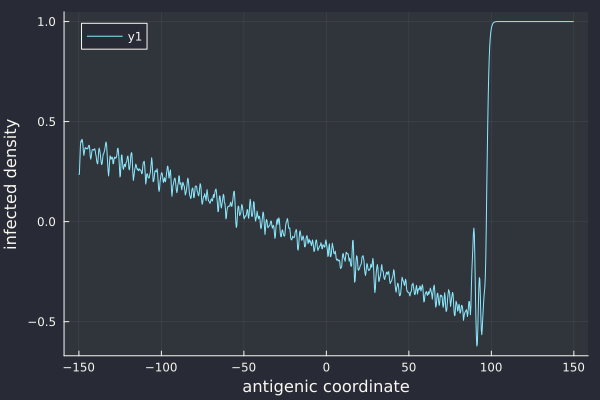

In [374]:
p = plot(xlabel="antigenic coordinate", ylabel="infected density")
for t_idx = 1:length(simulation.duration_times)÷300:length(simulation.duration_times)
    # plot!(p, simulation.trajectory[t_idx].populations[1].xs, simulation2.trajectory[t_idx].populations[1].viral_density )
    # plot!(p, simulation.trajectory[t_idx].populations[1].xs, simulation.trajectory[t_idx].populations[1].fitness )
end
plot!(p, simulation.trajectory[1].populations[1].xs, simulation2.trajectory[end].populations[1].fitness )
display(p)

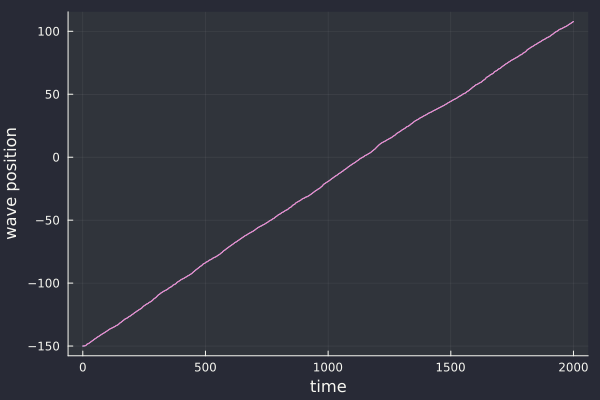

In [375]:
p = plot(simulation.duration_times, calculate_mean_antigenicity_per_deme(simulation)[1,:], xlabel="time", ylabel="wave position", legend=false)
plot!(p, simulation.duration_times, calculate_mean_antigenicity_per_deme(simulation)[2,:])

In [376]:
# data1 = copy(calculate_mean_antigenicity_per_deme(simulation))

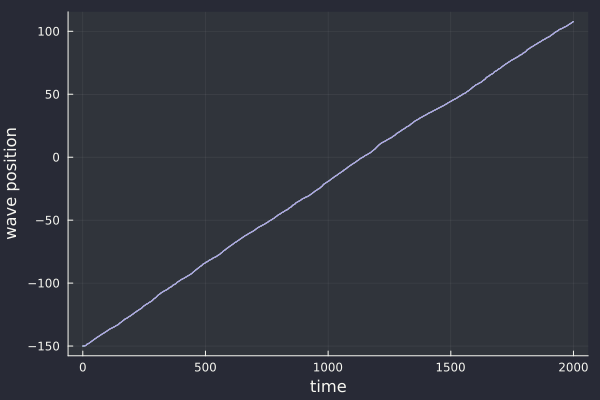

In [377]:
p = plot(simulation.duration_times, calculate_mean_antigenicity_per_deme(simulation)[1,:], xlabel="time", ylabel="wave position", legend=false)
plot!(p, simulation.duration_times, calculate_mean_antigenicity_per_deme(simulation)[2,:])
plot!(p, simulation.duration_times, data1[1,:])
plot!(p, simulation.duration_times, data1[2,:])

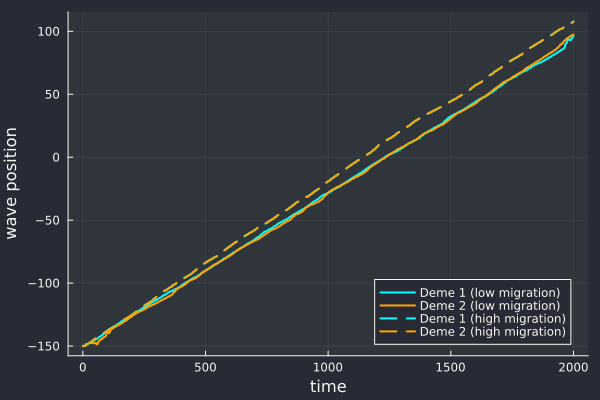

In [378]:
using Plots

# Define colors and line styles suitable for Dracula theme
colors = [:cyan :orange]
linestyles_data1 = [:dash :dash]  # Dashed lines for high migration (data1)
linestyles_data2 = [:solid :solid]  # Solid lines for low migration (data2)

# Create the plot with the first set of data (low migration - data2)
p = plot(simulation.duration_times, 
         data2[1, :], 
         xlabel="time", ylabel="wave position", 
         label="Deme 1 (low migration)", color=colors[1], linestyle=linestyles_data2[1], lw=2)

# Add the second deme's data for low migration
plot!(p, simulation.duration_times, 
      data2[2, :], 
      label="Deme 2 (low migration)", color=colors[2], linestyle=linestyles_data2[2], lw=2)

# Add the first deme's data for high migration (data1)
plot!(p, simulation.duration_times, 
      data1[1, :], 
      label="Deme 1 (high migration)", color=colors[1], linestyle=linestyles_data1[1], lw=2)

# Add the second deme's data for high migration
plot!(p, simulation.duration_times, 
      data1[2, :], 
      label="Deme 2 (high migration)", color=colors[2], linestyle=linestyles_data1[2], lw=2)

# plot!(p, simulation.duration_times,
#       data3[1,:],
#       label="single single combined deme", linestyle=:dashdot)
# Show the plot
p

# savefig(p, "withnoise.pdf")

In [379]:
r^2 * (beta - gamma) / D

892.8571428571429